In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("33-drug_discovery_virtual_screening.csv")

In [3]:
df.head()

compound_id protein_id  molecular_weight      logp  h_bond_donors  \
0   CID_00000    PID_361        499.671415  2.487233              1   
1   CID_00001    PID_165        436.173570  3.283222              3   
2   CID_00002    PID_168        514.768854       NaN              2   
3   CID_00003    PID_226        602.302986  3.038058              0   
4   CID_00004    PID_224        426.584663  0.659578              2   

   h_bond_acceptors  rotatable_bonds  polar_surface_area  compound_clogp  \
0                 7                4          113.350817        4.050696   
1                 4                4           71.981132        3.704408   
2                11               11           83.936307        1.869610   
3                 5                5           79.868125        2.451909   
4                 4                5           88.198676        1.771936   

   protein_length  protein_pi  hydrophobicity  binding_site_size  mw_ratio  \
0             678    6.019657        0.812534          12.512165  0.736978   
1             876    6.447408        0.651417          11.538420  0.497915   
2             658    3.925837        0.633467          13.155702  0.782323   
3             312    7.597056        0.513038          12.071822  1.930458   
4            1418    4.249454        0.613571          15.850448  0.300835   

   logp_pi_interaction  binding_affinity  active  
0            14.972288          5.996665       0  
1            21.168271          6.445742       0  
2             9.074061          5.689583       0  
3            23.080293          6.043438       0  
4             2.802846          4.845055       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   float64
 12  binding_site_size    2000 non-null   float64
 13  mw_ratio             2000 non-null   float64
 14  logp_pi_interaction  2000 non-null   float64
 15  binding_affinity     2000 non-null   f

In [5]:
df.describe()

molecular_weight         logp  h_bond_donors  h_bond_acceptors  \
count       2000.000000  1940.000000    2000.000000       2000.000000   
mean         456.772168     3.479480       1.961000          5.115000   
std          104.874658     1.638638       1.348105          2.330985   
min           50.307070    -4.325172       0.000000          0.000000   
25%          388.747480     2.419505       1.000000          3.000000   
50%          454.869085     3.501416       2.000000          5.000000   
75%          520.982885     4.518801       3.000000          7.000000   
max          994.048532     9.978489       8.000000         15.000000   

       rotatable_bonds  polar_surface_area  compound_clogp  protein_length  \
count       2000.00000         1940.000000     2000.000000      2000.00000   
mean           5.96850           80.026470        2.813403       848.92600   
std            2.40778           25.344944        1.188590       380.83777   
min            0.00000          -24.653688       -1.426170       201.00000   
25%            4.00000           63.166240        2.006000       509.50000   
50%            6.00000           80.606617        2.773587       844.00000   
75%            7.00000           97.366501        3.620260      1192.00000   
max           17.00000          159.627362        6.891681      1499.00000   

        protein_pi  hydrophobicity  binding_site_size     mw_ratio  \
count  2000.000000     1940.000000        2000.000000  2000.000000   
mean      6.460332        0.645325          15.155982     0.708989   
std       1.210236        0.095419           2.997837     0.475588   
min       2.597565        0.332013           4.655871     0.097804   
25%       5.615083        0.577986          13.144847     0.383770   
50%       6.473527        0.647452          15.237835     0.532021   
75%       7.270822        0.711428          17.184475     0.867184   
max      10.266937        0.978030          24.887713     3.403706   

       logp_pi_interaction  binding_affinity       active  
count          2000.000000       2000.000000  2000.000000  
mean             22.598329          6.531228     0.304000  
std              10.918200          1.194584     0.460098  
min              -6.624581          1.990381     0.000000  
25%              14.826016          5.856086     0.000000  
50%              21.858904          6.480304     0.000000  
75%              29.526168          7.164685     1.000000  
max              76.998672         15.039709     1.000000

In [6]:
df['active'].value_counts()

active
0    1392
1     608
Name: count, dtype: int64

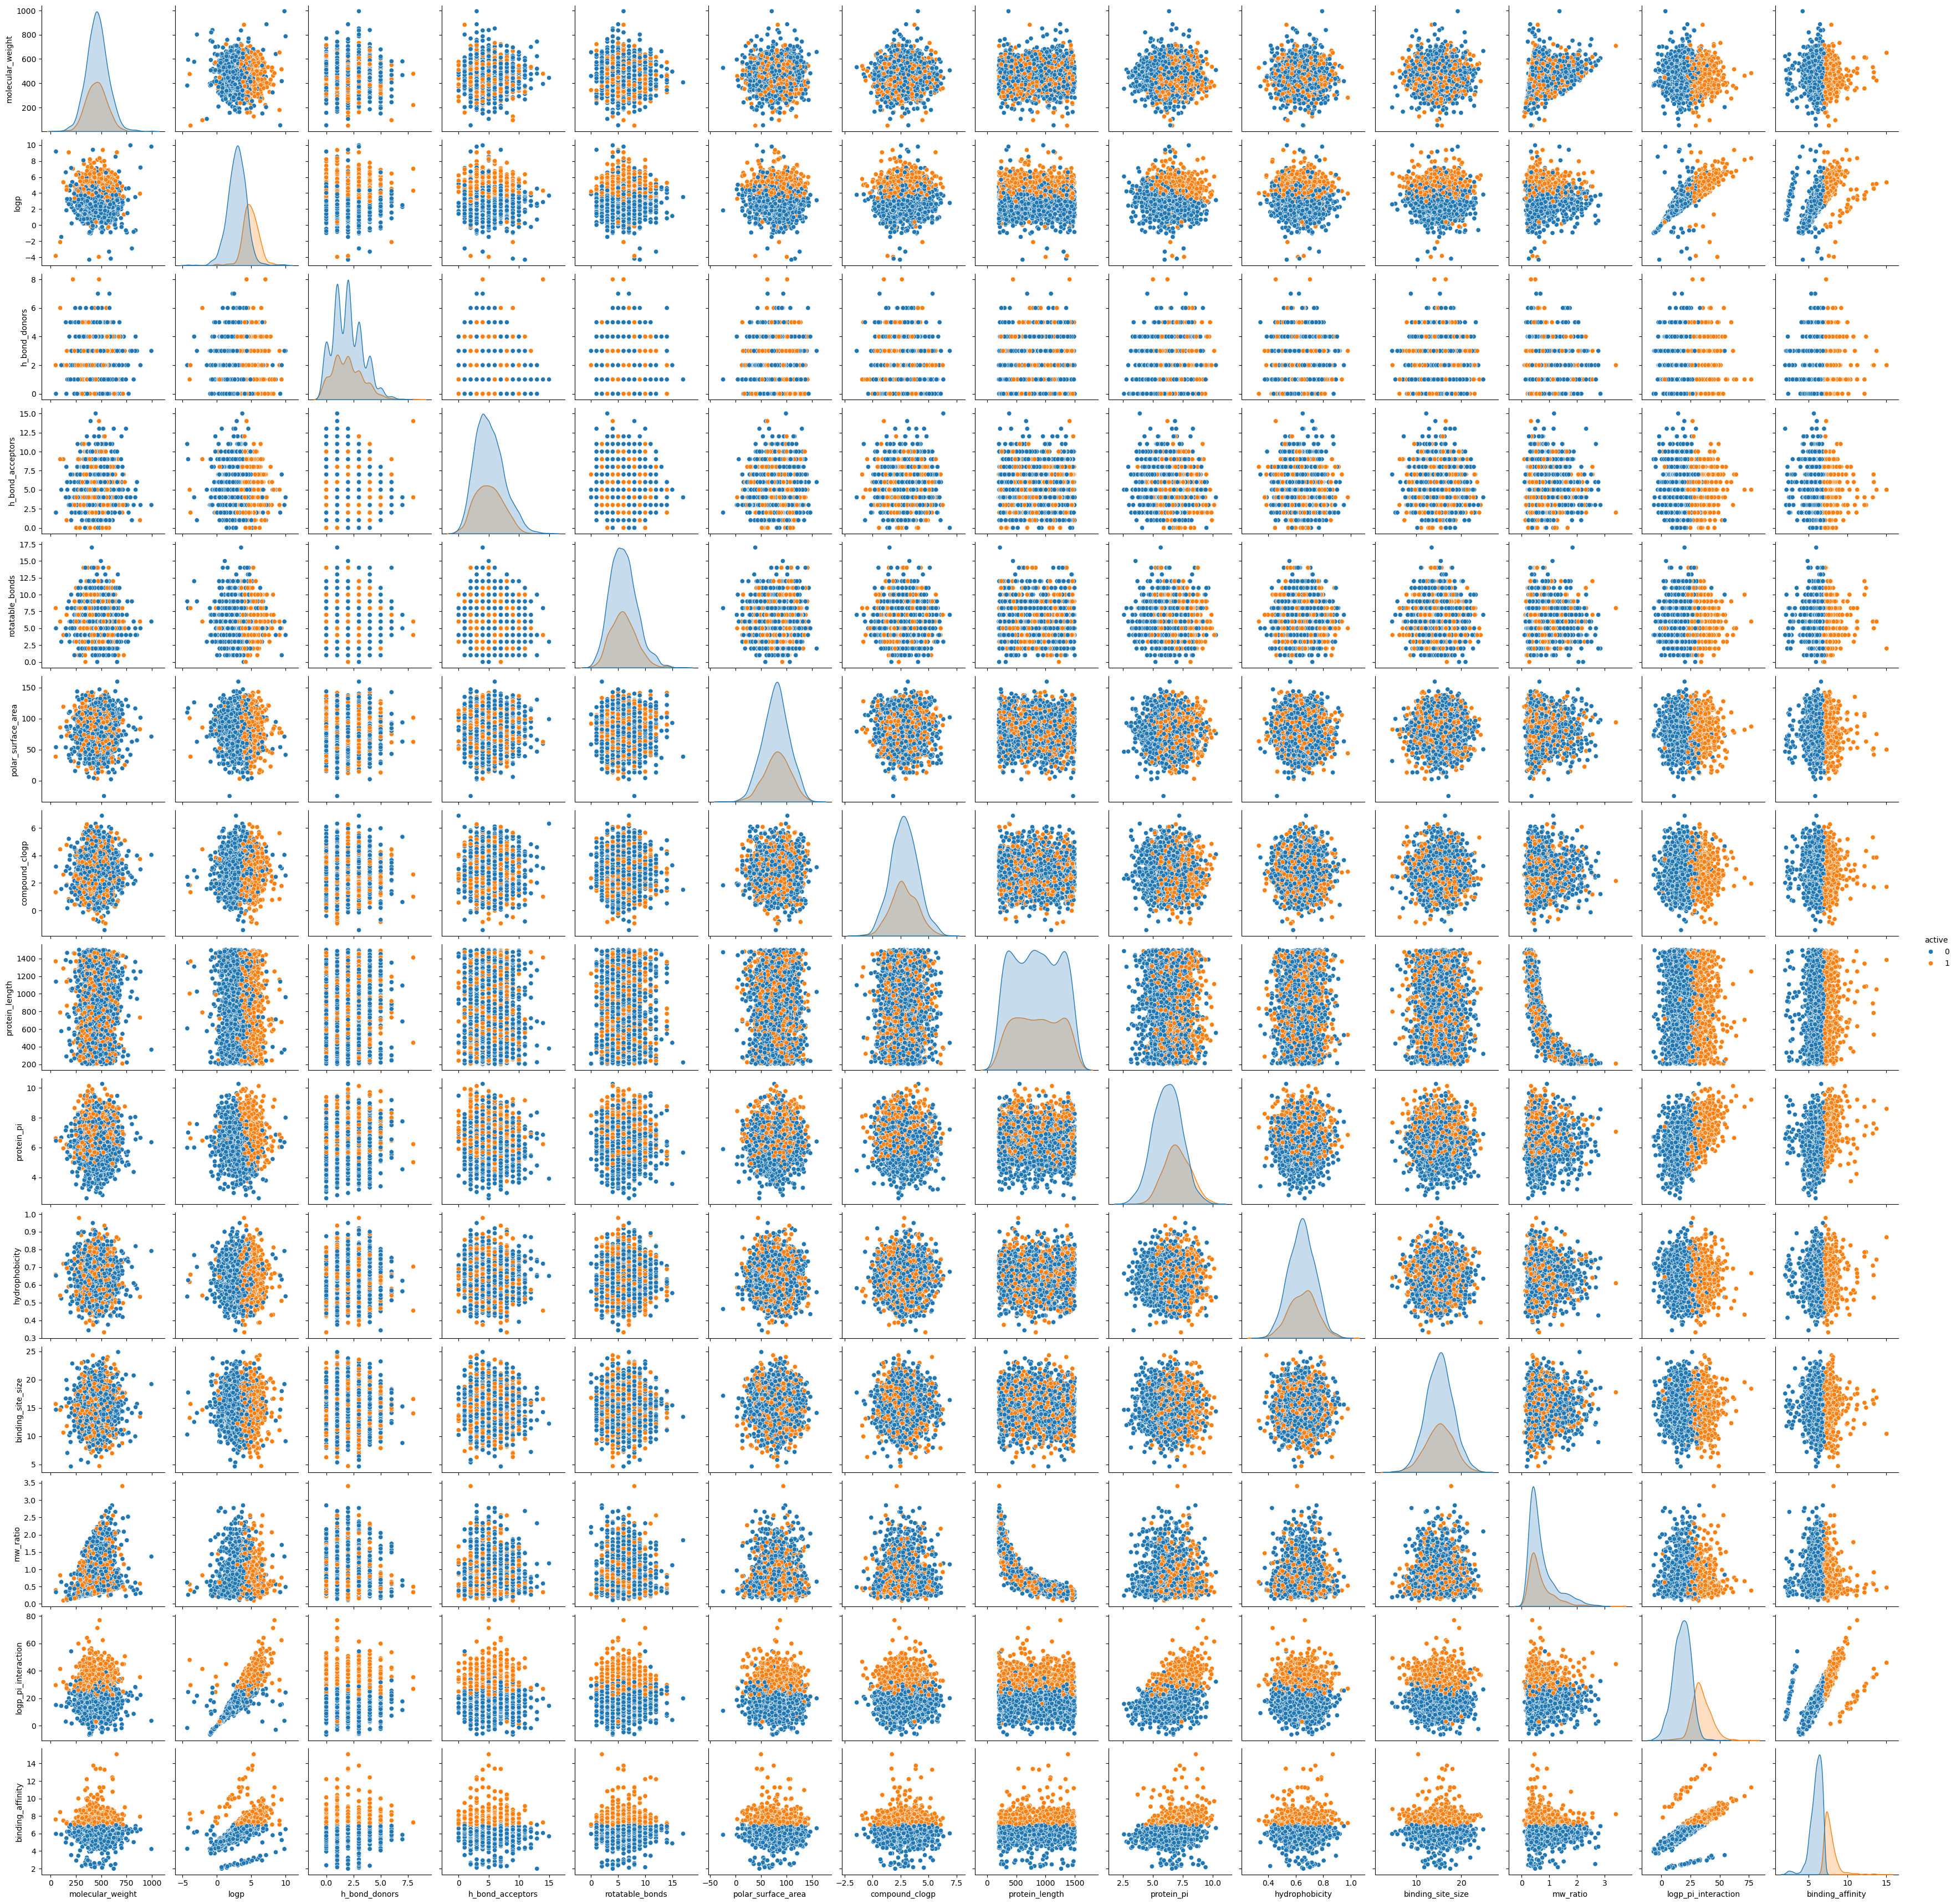

In [7]:
sns.pairplot(df,hue='active')
plt.show()

In [8]:
df["protein_id"].value_counts()

protein_id
PID_131    11
PID_170    11
PID_125    10
PID_237    10
PID_288    10
           ..
PID_473     1
PID_156     1
PID_488     1
PID_469     1
PID_436     1
Name: count, Length: 400, dtype: int64

# Missing Values

- Bu satırı atmak istemiyorum açıkçası etkili olabilir o sebeple target encoding yapmak daha mantıklı gibi geldi.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.drop(columns='compound_id', axis=1, inplace=True)

In [11]:
X = df.drop(columns=['active','protein_id'], axis=1)
y = df['active']

In [12]:
X.head()

molecular_weight      logp  h_bond_donors  h_bond_acceptors  \
0        499.671415  2.487233              1                 7   
1        436.173570  3.283222              3                 4   
2        514.768854       NaN              2                11   
3        602.302986  3.038058              0                 5   
4        426.584663  0.659578              2                 4   

   rotatable_bonds  polar_surface_area  compound_clogp  protein_length  \
0                4          113.350817        4.050696             678   
1                4           71.981132        3.704408             876   
2               11           83.936307        1.869610             658   
3                5           79.868125        2.451909             312   
4                5           88.198676        1.771936            1418   

   protein_pi  hydrophobicity  binding_site_size  mw_ratio  \
0    6.019657        0.812534          12.512165  0.736978   
1    6.447408        0.651417          11.538420  0.497915   
2    3.925837        0.633467          13.155702  0.782323   
3    7.597056        0.513038          12.071822  1.930458   
4    4.249454        0.613571          15.850448  0.300835   

   logp_pi_interaction  binding_affinity  
0            14.972288          5.996665  
1            21.168271          6.445742  
2             9.074061          5.689583  
3            23.080293          6.043438  
4             2.802846          4.845055

In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    0
1998    1
1999    1
Name: active, Length: 2000, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [15]:
df.isnull().sum()

protein_id              0
molecular_weight        0
logp                   60
h_bond_donors           0
h_bond_acceptors        0
rotatable_bonds         0
polar_surface_area     60
compound_clogp          0
protein_length          0
protein_pi              0
hydrophobicity         60
binding_site_size       0
mw_ratio                0
logp_pi_interaction     0
binding_affinity        0
active                  0
dtype: int64

In [16]:
for i in [X_train, X_test]:
    i['logp'] = i['logp'].fillna(X_train['logp'].mean())
    i['polar_surface_area'] = i['polar_surface_area'].fillna(X_train['polar_surface_area'].mean())
    i['hydrophobicity'] = i['hydrophobicity'].fillna(X_train['hydrophobicity'].mean())

In [17]:
X_train.isnull().sum()

molecular_weight       0
logp                   0
h_bond_donors          0
h_bond_acceptors       0
rotatable_bonds        0
polar_surface_area     0
compound_clogp         0
protein_length         0
protein_pi             0
hydrophobicity         0
binding_site_size      0
mw_ratio               0
logp_pi_interaction    0
binding_affinity       0
dtype: int64

In [18]:
X_test.isnull().sum()

molecular_weight       0
logp                   0
h_bond_donors          0
h_bond_acceptors       0
rotatable_bonds        0
polar_surface_area     0
compound_clogp         0
protein_length         0
protein_pi             0
hydrophobicity         0
binding_site_size      0
mw_ratio               0
logp_pi_interaction    0
binding_affinity       0
dtype: int64

# Encoding

In [19]:
X_train.head()

molecular_weight      logp  h_bond_donors  h_bond_acceptors  \
19          308.769630  1.641112              1                 8   
1181        589.200229  4.283214              3                 3   
1025        493.632367  2.917219              3                 6   
975         261.045927  3.658631              3                 3   
895         514.870989  9.389357              1                 7   

      rotatable_bonds  polar_surface_area  compound_clogp  protein_length  \
19                  2           61.212242        2.496108             811   
1181                5          124.628993        2.779253            1223   
1025                9           87.753858        2.541886            1385   
975                 6          110.214523        1.720796            1137   
895                 5           77.574809        1.783572             679   

      protein_pi  hydrophobicity  binding_site_size  mw_ratio  \
19      7.026330        0.414458          15.239374  0.380727   
1181    7.361789        0.645647          17.441469  0.481766   
1025    7.549561        0.750557          13.719123  0.356413   
975     6.995017        0.688849          13.682712  0.229592   
895     6.643247        0.509614          16.608645  0.758278   

      logp_pi_interaction  binding_affinity  
19              11.530998          2.292413  
1181            31.532117          6.713988  
1025            22.023721          6.854610  
975             25.592186          6.518708  
895             62.375813          9.876185

In [20]:
#y_train_binary = y_train.apply(lambda x:1 if x==1 else 0)

In [21]:
#target_means = y_train_binary.groupby(X_train['protein_id']).mean()

In [22]:
#target_means

In [23]:
#X_train['protein_id_encoded'] = X_train['protein_id'].map(target_means)
#X_train['protein_id_encoded'] = X_train['protein_id_encoded'].fillna(y_train_binary.mean())

#X_test['protein_id_encoded'] = X_test['protein_id'].map(target_means)
#X_test['protein_id_encoded'] = X_test['protein_id_encoded'].fillna(y_train_binary.mean())


In [24]:
#X_train.drop('protein_id', axis=1,inplace=True)
#X_test.drop('protein_id', axis=1,inplace=True)

In [25]:
#X_train.head()

In [26]:
#X_train.info()

In [27]:
#X_test.info()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_distributions = {
    'n_estimators' : [10,50,100,120,80,150],
    'max_depth' : [5,10,15,20,25,30,35,40,None],
    'min_samples_split' : [2,5,7,10,15],
    'max_features' : ['sqrt', 'log2', 1, 3, 5, 10, 15, 20, None]
}

In [30]:
rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distributions,scoring='accuracy', cv=3, verbose=3, refit=True, n_jobs=-1)

In [31]:
rfc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, None],
                                        'max_features': ['sqrt', 'log2', 1, 3,
                                                         5, 10, 15, 20, None],
                                        'min_samples_split': [2, 5, 7, 10, 15],
                                        'n_estimators': [10, 50, 100, 120, 80,
                                                         150]},
                   scoring='accuracy', verbose=3)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
y_pred = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       162

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix :
 [[438   0]
 [  0 162]]


In [34]:
rfc.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'max_features': 5,
 'max_depth': 40}

In [35]:
print("Train Accuracy:", rfc.score(X_train, y_train))
print("Test Accuracy:", rfc.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 1.0
